# My favorite Scipy-Stats algorithms
This notebook contains a demonstration and visualisation of a hypothesis testing using ANOVA, available through scipy-stats Python library.

## 1. ANOVA

## 2. Dataset

## 3. Null - Hypothesis

## 4. Testing

## 5. Interpretation

## 6. Conclusion

## References
"Statistical functions (scipy.stats) - scipy v1.7.1 manual", 2021. [Online]. Available: https://docs.scipy.org/doc/scipy/reference/stats.html

### Notes

#### probability distributions

Uniform - each value is equaly likely to be picked

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
uniform_data=stats.uniform.rvs(size=100000, #generate random 10k numbers
                               loc=0, #from 0
                               scale=10) #to 10

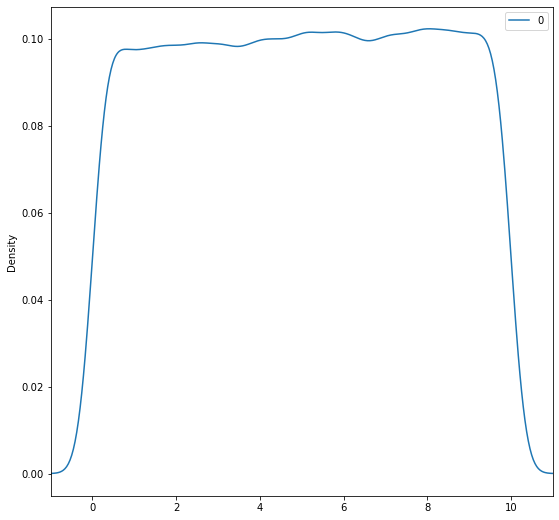

In [6]:
pd.DataFrame (uniform_data).plot(kind="density", #Plot the distribution
                                figsize=(9,9),
                                xlim=(-1,11));

we have the flat value where each value is equally likely to happen

In [7]:
stats.uniform.cdf(x=2.5, #cutoff value (quantile) to check
                 loc=0, #distribution start
                 scale=10) #distribution end

#cdf gives you an area under the distribution's density to the left of a certain value of the x axis

0.25

In [8]:
stats.uniform.ppf(q=0.4, #what x value we need to slice 40% of dist to the left of it?
                 loc=0,
                 scale=10)

#invers of cdf

4.0

In [10]:
#stats.distribution.pdf()

for x in range (-1,12,3):
    print("Density at x value"+str(x))
    print(stats.uniform.pdf(x,loc=0,scale=10))

Density at x value-1
0.0
Density at x value2
0.1
Density at x value5
0.1
Density at x value8
0.1
Density at x value11
0.0


Values outsode of range have no probability of happening while all values inside of range have equal probability.

In [11]:
import random

In [12]:
random.randint(0,10) #get a random integer in a specific range

1

In [13]:
random.choice([2,4,6,9]) #get a random element from a sequence of numbers

9

In [14]:
random.random() #get a real number between 0 and 1; balically from uniform distribution

0.4544141499018053

In [18]:
random.uniform(0,1) #output not the same as there is no seed

0.13947427862793504

In [26]:
random.seed(12)
random.uniform(0,1)

0.4745706786885481

In [27]:
random.seed(12)
random.random()

0.4745706786885481

Now we have the same output.

Numpy and scipy have different built in functions for generating random numbers

#### Normal distribution

Bell shaped curve, mean and median are equal. 99.7% lies within 3 standard deviations.

In [28]:
prob_under_minus1=stats.norm.cdf(x=-1,
                                loc=0,
                                scale=1)
prob_over_1= 1- stats.norm.cdf(x=1,
                                loc=0,
                                scale=1)
between_prob=1-(prob_under_minus1+prob_over_1)
print(prob_under_minus1,between_prob)

0.15865525393145707 0.6826894921370859


Roughly 16% of data generated by a normal distr. is within 1 standard deviation from the mean.

In [30]:
print(stats.norm.ppf(q=0.025)) #find the quantile for 2.5% cutoff


-1.9599639845400545


In [32]:
print(stats.norm.ppf(q=0.975)) #find the quantile for 97.5% cutoff

1.959963984540054


In [33]:
print(stats.norm.cdf(x=3)) #data below -3

0.9986501019683699


In [34]:
print(stats.norm.cdf(x=-3))

0.0013498980316300933


### Binomial distribution

Discrete probability distribution. Answers: How likely it is to achieve p number of successes in n trials of the experiment?

col_0   0    1    2     3     4     5     6     7    8    9   10
row_0                                                           
counts   7  113  447  1161  2098  2441  2017  1155  449  100  12


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

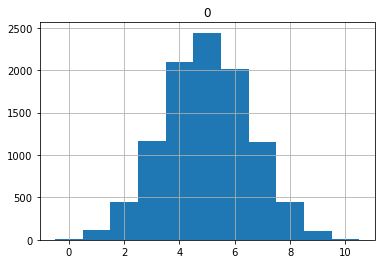

In [35]:
fair_coin_flips=stats.binom.rvs(n=10, #n of flips per trials
                               p=0.5, #success probability
                               size=10000) #n of trial
print(pd.crosstab(index="counts",columns=fair_coin_flips))
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5),bins=11)

col_0   2   3   4    5    6     7     8     9     10
row_0                                               
counts   1   6  59  276  858  1980  3071  2665  1084


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

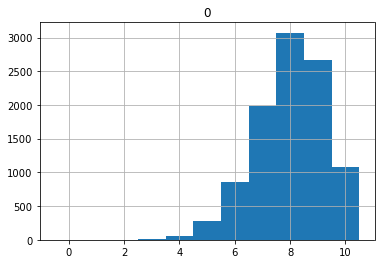

In [37]:
biased_fair_coin_flips=stats.binom.rvs(n=10, #n of flips per trials
                               p=0.8, #success probability, 
                               size=10000) #n of trial
print(pd.crosstab(index="counts",columns=biased_fair_coin_flips))
pd.DataFrame(biased_fair_coin_flips).hist(range=(-0.5,10.5),bins=11)

as we set the success probability to 0.8, this is how the function looks like.

In [39]:
stats.binom.cdf(k=5,n=10,p=0.8) #prob of getting 5 successes or less with 10 flips and success probability of 80%

0.032793497599999964

#### Geometric and exponential

Geometric is discrete and exponential is a continuous.

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13
row_0                                                              
counts  5045  2479  1246  598  304  163  76  53  13  12   5   2   4


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

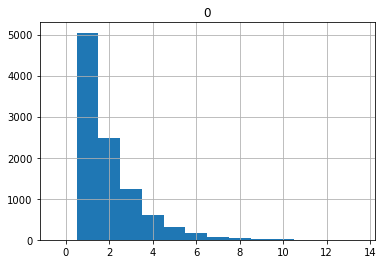

In [42]:
#how many flips we need to get to flipp on the head side of the coin?
random.seed(12)

flips_till_heads=stats.geom.rvs(size=10000, #generate geometric data
                                p=0.5) #with success prob 0.5

#print table of counts
print(pd.crosstab(index="counts", columns=flips_till_heads))

#plot
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5),
                                    bins=max(flips_till_heads)+1)

it is very likely to take 1 or 2 flips to get to head, but more unlikely to take more than 5 flips.

Exponentional 

In [44]:
#Get the prob of waiting more than 1 time unit before a success
prob_1=stats.expon.cdf(x=1,
                       scale=1) #arrival rate
1-prob_1 #the avf time for expon is 1-arrival rate

0.36787944117144233

#### Poisson distribution

Number of successes in certain time interval, e.g. number of arrivals to the hospital in a given time

col_0      0     1     2    3    4   5  6  7
row_0                                       
counts  3685  3661  1834  623  156  33  7  1


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

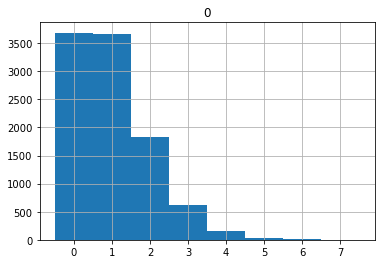

In [45]:
random.seed(12)
arrival_rate_1=stats.poisson.rvs(size=10000, #generate poisson data
                                mu=1) #avg arrival time is 1
#print table of counts
print(pd.crosstab(index="counts",columns=arrival_rate_1))

#plot
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5),
                                 bins=max(arrival_rate_1)+1)

It seems that we often see 0 and 1 arrivals within one hour, we see 2 people arriving half as often and so on.

Please note than Poisson distribution will not always look right skewed, as opposed to geo/expo. It depends on how we set it up.

col_0   0   1   2   3    4    5    6    7     8     9   ...   14   15   16  \
row_0                                                   ...                  
counts   1   4  22  72  152  331  592  872  1189  1342  ...  553  334  218   

col_0    17  18  19  20  21  22  24  
row_0                                
counts  115  59  36  14   7   5   2  

[1 rows x 24 columns]


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

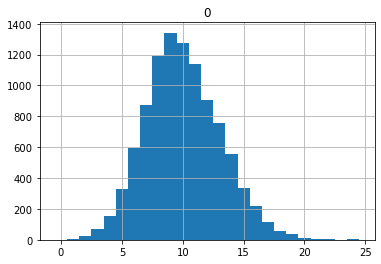

In [46]:
random.seed(12)
arrival_rate_1=stats.poisson.rvs(size=10000, #generate poisson data
                                mu=10) #avg arrival time is 1
#print table of counts
print(pd.crosstab(index="counts",columns=arrival_rate_1))

#plot
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5),
                                 bins=max(arrival_rate_1)+1)

Like this. If the avg arrival time is 10, distribution will look like this.